
Data Sources¶

Common data sources for predictive maintenance problems are :

1. Failure history: The failure history of a machine or component within the machine.
2. Maintenance history: The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
3. Machine conditions and usage: The operating conditions of a machine e.g. data collected from sensors.
4. Machine features: The features of a machine, e.g. engine size, make and model, location.
5. Operator features: The features of the operator, e.g. gender, past experience 

The data for this example comes from 4 different sources which are real-time telemetry data collected from machines, error messages, historical maintenance records that include failures and maintenance

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv

--2019-12-26 01:36:38--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80142329 (76M) [application/octet-stream]
Saving to: ‘PdM_telemetry.csv’

PdM_telemetry.csv   100%[===================>]  76.43M  28.6MB/s    in 2.7s    

2019-12-26 01:36:41 (28.6 MB/s) - ‘PdM_telemetry.csv’ saved [80142329/80142329]



In [0]:
telemetry = pd.read_csv('PdM_telemetry.csv')
telemetry

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [0]:
pd.DataFrame(telemetry.dtypes,columns=['Data type']).T

,datetime,machineID,volt,rotate,pressure,vibration
Data type,object,int64,float64,float64,float64,float64


In [0]:
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv

--2019-12-26 01:36:50--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129077 (126K) [application/octet-stream]
Saving to: ‘PdM_errors.csv’

PdM_errors.csv      100%[===================>] 126.05K  --.-KB/s    in 0.1s    

2019-12-26 01:36:50 (1.29 MB/s) - ‘PdM_errors.csv’ saved [129077/129077]



In [0]:
errors = pd.read_csv('PdM_errors.csv')
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [0]:
pd.DataFrame(errors.dtypes,columns=['Data type']).T

,datetime,machineID,errorID
Data type,object,int64,object


In [0]:
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv

--2019-12-26 01:36:58--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104903 (102K) [application/octet-stream]
Saving to: ‘PdM_maint.csv’

PdM_maint.csv       100%[===================>] 102.44K  --.-KB/s    in 0.1s    

2019-12-26 01:36:58 (1.04 MB/s) - ‘PdM_maint.csv’ saved [104903/104903]



In [0]:
maint = pd.read_csv('PdM_maint.csv')
maint

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


In [0]:
pd.DataFrame(maint.dtypes,columns=['Data type']).T

,datetime,machineID,comp
Data type,object,int64,object


In [0]:
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv

--2019-12-26 01:37:06--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24336 (24K) [application/octet-stream]
Saving to: ‘PdM_failures.csv’

PdM_failures.csv    100%[===================>]  23.77K  --.-KB/s    in 0.03s   

2019-12-26 01:37:06 (754 KB/s) - ‘PdM_failures.csv’ saved [24336/24336]



In [0]:
failures = pd.read_csv('PdM_failures.csv')
failures

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


In [0]:
pd.DataFrame(failures.dtypes,columns=['Data type']).T

,datetime,machineID,failure
Data type,object,int64,object


In [0]:
!wget https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv

--2019-12-26 01:37:17--  https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv
Resolving azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)... 13.65.107.32
Connecting to azuremlsampleexperiments.blob.core.windows.net (azuremlsampleexperiments.blob.core.windows.net)|13.65.107.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1582 (1.5K) [application/octet-stream]
Saving to: ‘PdM_machines.csv’

PdM_machines.csv    100%[===================>]   1.54K  --.-KB/s    in 0s      

2019-12-26 01:37:17 (432 MB/s) - ‘PdM_machines.csv’ saved [1582/1582]



In [0]:
machines = pd.read_csv('PdM_machines.csv')
machines

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [0]:
pd.DataFrame(machines.dtypes,columns=['Data type']).T

,machineID,model,age
Data type,int64,object,int64


The first data source is the telemetry time-series data which consists of voltage, rotation, pressure, and vibration measurements collected from 100 machines in real time averaged over ever

In [0]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print('Total number of telemetry records: {}'.format(len(telemetry.index)))
print(telemetry.head())
telemetry.describe()


Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  vibration
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


As an example, below is a plot of voltage values for machine ID 1 for the first half of 2015.

Text(0.5, 0, 'Date')

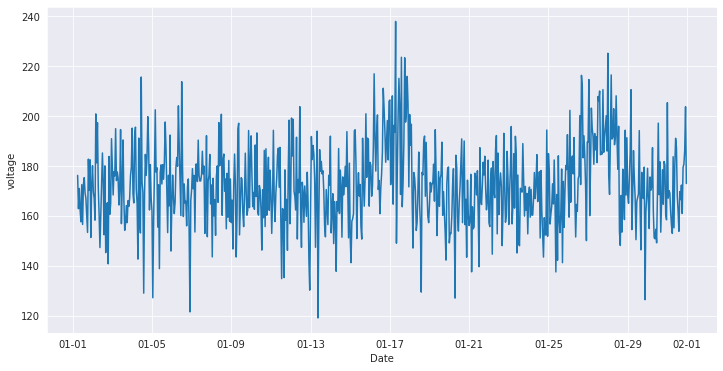

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')


Errors¶

The second major data source is the error logs. These are non-breaking errors thrown while the machine is still operational and do not constitute as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.


In [0]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print('Total number of error records: {}'.format(len(errors.index)))
errors.head()


Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [0]:
pd.DataFrame(errors.dtypes,columns=['Data type']).T

,datetime,machineID,errorID
Data type,datetime64[ns],int64,category


Text(0, 0.5, 'Count')

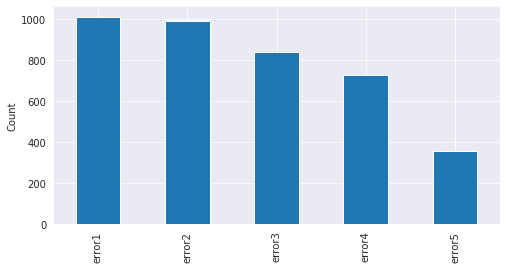

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')


Maintenance¶

These are the scheduled and unscheduled maintenance records which correspond to both regular inspection of components as well as failures. A record is generated if a component is replaced during the scheduled inspection or replaced due to a breakdown. The records that are created due to breakdowns will be called failures which is explained in the later sections. Maintenance data has both 2014 and 2015 records.


In [0]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print('Total number of maintenance records: {}'.format(len(maint.index)))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [0]:
pd.DataFrame(maint.dtypes,columns=['Data type']).T

,datetime,machineID,comp
Data type,datetime64[ns],int64,category


Text(0, 0.5, 'Count')

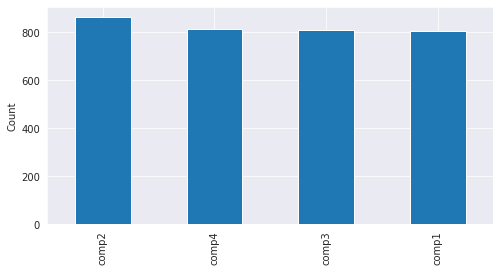

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')


Machines¶

This data set includes some information about the machines: model type and age (years in service).


In [0]:
machines['model'] = machines['model'].astype('category')

print('Total number of machines: {}'.format(len(machines.index)))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [0]:
pd.DataFrame(machines.dtypes,columns=['Data type']).T

,machineID,model,age
Data type,int64,category,int64


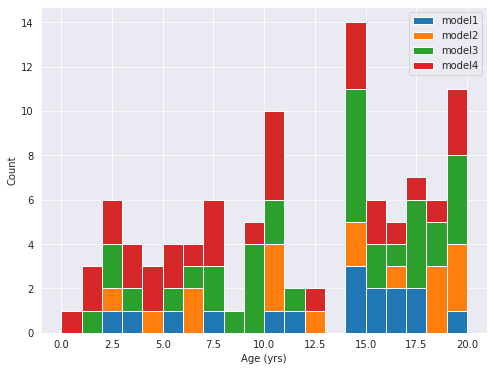

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()


Failures¶

These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failed component type.


In [0]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print('Total number of failures: {}'.format(len(failures.index)))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [0]:
pd.DataFrame(failures.dtypes,columns=['Data type']).T

,datetime,machineID,failure
Data type,datetime64[ns],int64,category


Below is the histogram of the failures due to each component. We see that the most failures happen due to component 2.

Text(0, 0.5, 'Count')

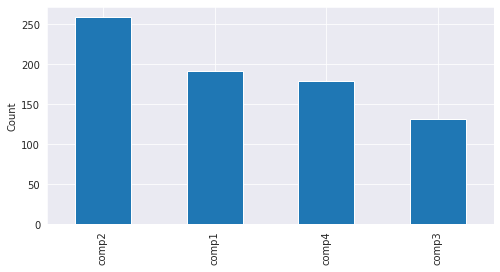

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')


Feature Engineering¶

The first step in predictive maintenance applications is feature engineering which requires bringing the different data sources together to create features that best describe a machines's health condition at a given point in time. In the next sections, several feature engineering methods are used to create features based on the properties of each data source.



Lag Features from Telemetry¶

Telemetry data almost always comes with time-stamps which makes it suitable for calculating lagging features. A common method is to pick a window size for the lag features to be created and compute rolling aggregate measures such as mean, standard deviation, minimum, maximum, etc. to represent the short term history of the telemetry over the lag window. In the following, rolling mean and standard deviation of the telemetry data over the last 3 hour lag window is calculated for every 3 hours.


In [0]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [0]:
pd.DataFrame(telemetry_mean_3h.dtypes,columns=['Data type']).T

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
Data type,int64,datetime64[ns],float64,float64,float64,float64


For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [0]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).mean().resample('3H',
                                                                              closed='left',
                                                                              label='right').first().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).std().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


In [0]:
pd.DataFrame(telemetry_mean_24h.dtypes,columns=['Data type']).T

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
Data type,int64,datetime64[ns],float64,float64,float64,float64


Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [0]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.ix[:, 2:6],
                            telemetry_mean_24h.ix[:, 2:6],
                            telemetry_sd_24h.ix[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [0]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [0]:
pd.DataFrame(telemetry_feat.dtypes,columns=['Data type']).T

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
Data type,int64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64



Lag Features from Errors¶

Like telemetry data, errors come with timestamps. An important difference is that the error IDs are categorical values and should not be averaged over time intervals like the telemetry measurements. Instead, we count the number of errors of each type in a lagging window. We begin by reformatting the error data to have one entry per machine per time at which at least one error occurred:


In [0]:
# create a column for each error type
error_count = pd.get_dummies(errors)
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour

error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [0]:
pd.DataFrame(error_count.dtypes,columns=['Data type']).T

,machineID,datetime,error1,error2,error3,error4,error5
Data type,int64,datetime64[ns],uint8,uint8,uint8,uint8,uint8


Now we add blank entries for all other hourly timepoints (since no errors occurred at those times):

In [0]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:

In [0]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [0]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [0]:
pd.DataFrame(error_count.dtypes,columns=['Data type']).T

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
Data type,int64,datetime64[ns],float64,float64,float64,float64,float64



Days Since Last Replacement from Maintenance¶

A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.


In [0]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
    
# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]


for comp in components:
    
   

    comp_rep[comp] = (comp_rep['datetime'] - pd.to_datetime(comp_rep[comp])).apply(lambda x: x / pd.Timedelta(days=1))

       
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [0]:
pd.DataFrame(comp_rep.dtypes,columns=['Data type']).T

,datetime,machineID,comp1,comp2,comp3,comp4
Data type,datetime64[ns],int64,float64,float64,float64,float64


In [0]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667



Machine Features¶

The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.


In [0]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  ...    comp4   model  age
0          1 2015-01-02 06:00:00   180.133784  ...  170.000  model3   18
1          1 2015-01-02 09:00:00   176.364293  ...  170.125  model3   18
2          1 2015-01-02 12:00:00   160.384568  ...  170.250  model3   18
3          1 2015-01-02 15:00:00   170.472461  ...  170.375  model3   18
4          1 2015-01-02 18:00:00   163.263806  ...  170.500  model3   18

[5 rows x 29 columns]


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000



Label Construction¶

When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records. This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical failure feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have failure=comp1, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have failure=none.


In [0]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')

labeled_features = labeled_features.bfill(axis=1).ffill(axis=1)
#labeled_features = labeled_features.fillna(method='bfill', limit=7, inplace=True) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,18


In [0]:
pd.DataFrame(comp_rep.dtypes,columns=['Data type']).T

,datetime,machineID,comp1,comp2,comp3,comp4
Data type,datetime64[ns],int64,float64,float64,float64,float64



Below is an example of records that are labeled as failure=comp4 in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 4. The next 8 records are within the 24 hour window before another failure of component 4.


In [0]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,170.757841,440.958228,98.716746,51.746749,20.837993,34.051825,9.654971,5.066388,0.0,0.0,0.0,0.0,1.0,0.0,218.0,158.0,0.0,model3,18,comp4
1344,1,2015-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,170.445687,463.690447,101.515062,47.807739,15.872992,49.495570,9.978860,5.184487,0.0,0.0,0.0,0.0,1.0,0.0,30.0,15.0,0.0,model3,18,comp4
1944,1,2015-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,167.029771,443.829391,96.763961,56.557153,15.342985,46.695751,12.134162,7.775558,0.0,0.0,0.0,0.0,1.0,0.0,60.0,90.0,0.0,model3,18,comp4
2784,1,2015-12-16 06:00:00,188.941806,421.756494,86.684047,51.410144,35.295874,7.839110,9.139511,3.598700,171.788966,441.223916,100.700667,50.171569,11.032504,44.242508,10.373906,5.148273,0.0,0.0,0.0,0.0,1.0,75.0,30.0,15.0,0.0,model3,18,comp4
17656,7,2015-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,166.811536,362.438916,100.749561,49.510716,17.595689,42.688913,9.934615,6.238848,0.0,1.0,1.0,0.0,1.0,207.0,0.0,207.0,0.0,model3,20,comp4
18496,7,2015-05-09 06:00:00,175.911702,467.458682,103.589910,52.610306,12.400140,69.604586,11.162580,1.658487,178.152614,443.530687,99.552659,51.131662,16.274802,45.450934,9.069829,5.332286,0.0,0.0,0.0,0.0,1.0,0.0,30.0,45.0,0.0,model3,20,comp4
19576,7,2015-09-21 06:00:00,169.123329,428.763286,99.428189,45.397202,21.723826,100.568119,22.697296,3.416446,168.418191,461.439426,104.776573,49.026631,15.780937,54.286574,9.112983,4.553363,0.0,0.0,0.0,0.0,1.0,0.0,30.0,60.0,0.0,model3,20,comp4
21025,8,2015-03-22 06:00:00,173.026438,429.852151,102.408383,54.340943,11.452078,42.822464,11.195405,7.115879,175.462890,437.799564,101.178980,50.022666,14.836537,54.453240,10.514693,4.742447,0.0,0.0,0.0,0.0,1.0,60.0,15.0,204.0,0.0,model3,16,comp4
22105,8,2015-08-04 06:00:00,178.611054,425.076676,102.481539,48.617995,12.652412,22.014775,18.517554,2.918507,172.592814,458.454041,98.882610,49.410772,13.561776,60.944818,11.413782,4.850894,0.0,0.0,0.0,0.0,1.0,30.0,45.0,15.0,0.0,model3,16,comp4
22705,8,2015-10-18 06:00:00,166.642406,452.842842,104.470047,52.080654,5.920407,46.523492,5.792959,4.005665,173.747366,468.027501,100.173176,48.740484,11.828295,49.724469,9.775905,5.506232,0.0,0.0,0.0,0.0,1.0,15.0,60.0,90.0,0.0,model3,16,comp4


In [0]:
labeled_features.head(10)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,18
5,1,2015-01-02 21:00:00,163.278466,446.493166,104.387585,38.068116,21.580492,41.380958,20.725597,6.932127,170.556674,452.267095,98.065860,40.033247,14.402740,42.626186,10.408012,5.941890,0.0,0.0,0.0,0.0,0.0,20.625,215.625,155.625,170.625,model3,18,18
6,1,2015-01-03 00:00:00,172.191198,434.214692,93.747282,39.716482,16.369836,14.636041,18.817326,3.426997,168.460525,451.031783,99.273286,38.903462,15.513819,40.395881,10.833294,5.737671,0.0,0.0,0.0,0.0,0.0,20.750,215.750,155.750,170.750,model3,18,18
7,1,2015-01-03 03:00:00,175.210027,504.845430,108.512153,37.763933,5.991921,16.062702,6.382608,3.449468,169.772951,447.502464,99.005946,39.389725,15.726970,39.648116,11.904700,5.601191,0.0,0.0,0.0,0.0,0.0,20.875,215.875,155.875,170.875,model3,18,18
8,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,170.900562,453.864597,100.877342,38.696225,15.635083,41.828592,11.326412,5.583521,0.0,0.0,0.0,0.0,0.0,21.000,216.000,156.000,171.000,model3,18,18
9,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,169.533156,454.785072,100.050567,39.449734,13.995465,40.843882,11.036546,5.561553,0.0,0.0,0.0,0.0,0.0,21.125,216.125,156.125,171.125,model3,18,18



#Modelling

After the feature engineering and labelling steps, either Azure Machine Learning Studio or this notebook can be used to create a predictive model. The recommend Azure Machine Learning Studio experiment can be found in the Cortana Intelligence Gallery: Predictive Maintenance Modelling Guide Experiment. Below, we describe the modelling process and provide an example Python model.



Training, Validation and Testing¶

When working with time-stamped data as in this example, record partitioning into training, validation, and test sets should be performed carefully to prevent overestimating the performance of the models. In predictive maintenance, the features are usually generated using lagging aggregates: records in the same time window will likely have identical labels and similar feature values. These correlations can give a model an "unfair advantage" when predicting on a test set record that shares its time window with a training set record. We therefore partition records into training, validation, and test sets in large chunks, to minimize the number of time intervals shared between them.

Predictive models have no advance knowledge of future chronological trends: in practice, such trends are likely to exist and to adversely impact the model's performance. To obtain an accurate assessment of a predictive model's performance, we recommend training on older records and validating/testing using newer records.

For both of these reasons, a time-dependent record splitting strategy is an excellent choice for predictive maintenace models. The split is effected by choosing a point in time based on the desired size of the training and test sets: all records before the timepoint are used for training the model, and all remaining records are used for testing. (If desired, the timeline could be further divided to create validation sets for parameter selection.) To prevent any records in the training set from sharing time windows with the records in the test set, we remove any records at the boundary -- in this case, by ignoring 24 hours' worth of data prior to the timepoint.


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

# make test and training splits
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data



    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'datetime']
    
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], 1))
    
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                       'machineID',
                                                                                                       'failure'], 1))
   

In [0]:
train_X.shape, test_X.shape

((216732, 30), (73809, 30))

In [0]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X_scale = scaler.fit_transform(train_X)
test_X_scale = scaler.transform(test_X)

In [0]:
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(train_X_scale, train_y, random_state=0)

In [0]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [0]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    my_model  = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    my_model .fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(my_model.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(my_model.score(X_validation_sub, y_validation_sub)))
    print()

KeyboardInterrupt: ignored

In [0]:
print(train_y.shape)

(216732,)


In [0]:
print(train_X.shape)

(216732, 30)


In [0]:
print(test_X.shape)

(73809, 30)


In [0]:
train_y.head()

0   2015-01-02 06:00:00
1   2015-01-02 09:00:00
2   2015-01-02 12:00:00
3   2015-01-02 15:00:00
4   2015-01-02 18:00:00
Name: datetime, dtype: datetime64[ns]

In [0]:
train_X.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0


In [0]:
test_X.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
2175,170.301017,449.036995,94.805205,40.816797,11.061667,58.425055,4.931305,2.428740,178.008406,453.336357,102.683692,40.038613,15.281376,51.271446,7.982720,5.003900,0.0,0.0,0.0,0.0,0.0,28.875,13.875,118.875,28.875,18,0,0,1,0
2176,165.339972,435.660354,103.351320,31.892462,10.717864,26.009485,22.071933,6.020669,178.277009,452.064940,103.387953,40.382551,14.604326,54.077142,9.479323,4.621571,0.0,0.0,0.0,0.0,0.0,29.000,14.000,119.000,29.000,18,0,0,1,0
2177,183.752875,463.058640,109.525083,41.945037,9.369264,43.646584,10.859804,9.395067,176.380067,444.022795,103.622701,38.885907,15.021543,50.702138,10.559279,5.258601,0.0,0.0,0.0,0.0,0.0,29.125,14.125,119.125,29.125,18,0,0,1,0
2178,177.866822,506.692032,98.745260,39.861149,16.596090,38.086352,10.410456,5.418325,176.356632,457.097293,102.904755,38.625804,14.562010,50.034820,10.837744,5.589588,0.0,0.0,0.0,0.0,0.0,29.250,14.250,119.250,29.250,18,0,0,1,0
2179,167.471524,425.963281,111.996389,39.396999,9.015089,63.342755,4.648154,6.365146,177.911567,453.677320,103.111088,39.028015,14.642907,45.384165,10.816778,5.485460,0.0,0.0,0.0,0.0,0.0,29.375,14.375,119.375,29.375,18,0,0,1,0


In [0]:
train_y.shape

(216732,)

In [0]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[comp_rep[comp].isnull(), comp] = comp_rep.loc[comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

In [0]:
comp_rep

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,82.833333,7.833333,82.833333,52.833333
876096,2016-01-01 03:00:00,100,82.875000,7.875000,82.875000,52.875000
876097,2016-01-01 04:00:00,100,82.916667,7.916667,82.916667,52.916667
876098,2016-01-01 05:00:00,100,82.958333,7.958333,82.958333,52.958333


In [0]:
pd.DataFrame(comp_rep.dtypes,columns=['Data type']).T

,datetime,machineID,comp1,comp2,comp3,comp4
Data type,datetime64[ns],int64,float64,float64,float64,float64


In [0]:
# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

In [0]:
pd.DataFrame(comp_rep.dtypes,columns=['Data type']).T

,datetime,machineID,comp1,comp2,comp3,comp4
Data type,datetime64[ns],int64,float64,float64,float64,float64


In [0]:
def convert_exp(val):
    """
    Convert the string number value to a float
     - Remove +
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('+', '')
    return float(new_val)


Days Since Last Replacement from Maintenance¶

A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.


In [0]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [0]:
pd.DataFrame(comp_rep.dtypes,columns=['Data type']).T

,datetime,machineID,comp1,comp2,comp3,comp4
Data type,datetime64[ns],int64,float64,float64,float64,float64



Machine Features¶

The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.


In [0]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  ...    comp4   model  age
0          1 2015-01-02 06:00:00   180.133784  ...  170.000  model3   18
1          1 2015-01-02 09:00:00   176.364293  ...  170.125  model3   18
2          1 2015-01-02 12:00:00   160.384568  ...  170.250  model3   18
3          1 2015-01-02 15:00:00   170.472461  ...  170.375  model3   18
4          1 2015-01-02 18:00:00   163.263806  ...  170.500  model3   18

[5 rows x 29 columns]


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,2.913000e+05,2.913000e+05,2.913000e+05,2.913000e+05,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,2.754144e+16,2.994686e+16,2.781937e+16,2.792710e+16,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,1.969751e+17,2.052189e+17,1.979535e+17,1.983083e+17,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,1.425000e+01,1.312500e+01,1.412500e+01,1.400000e+01,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,3.475000e+01,3.175000e+01,3.425000e+01,3.450000e+01,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,7.262500e+01,7.112500e+01,7.125000e+01,7.462500e+01,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,1.451628e+18,1.451628e+18,1.451628e+18,1.451628e+18,20.000000


In [0]:
pd.DataFrame(final_feat.dtypes,columns=['Data type']).T

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
Data type,int64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,category,int64



Label Construction¶

When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as "Â€Âœnormal." This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical failure feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have failure=comp1, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have failure=none.

Below is an example of records that are labeled as failure=comp4 in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 4. The next 8 records are within the 24 hour window before another failure of component 4.


In [0]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')

In [0]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,170.757841,440.958228,98.716746,51.746749,20.837993,34.051825,9.654971,5.066388,0.0,0.0,0.0,0.0,1.0,1.420438e+18,2.180000e+02,1.580000e+02,1.420438e+18,model3,18,comp4
1344,1,2015-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,170.445687,463.690447,101.515062,47.807739,15.872992,49.495570,9.978860,5.184487,0.0,0.0,0.0,0.0,1.0,1.434694e+18,3.000000e+01,1.500000e+01,1.434694e+18,model3,18,comp4
1944,1,2015-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,167.029771,443.829391,96.763961,56.557153,15.342985,46.695751,12.134162,7.775558,0.0,0.0,0.0,0.0,1.0,1.441174e+18,6.000000e+01,9.000000e+01,1.441174e+18,model3,18,comp4
2784,1,2015-12-16 06:00:00,188.941806,421.756494,86.684047,51.410144,35.295874,7.839110,9.139511,3.598700,171.788966,441.223916,100.700667,50.171569,11.032504,44.242508,10.373906,5.148273,0.0,0.0,0.0,0.0,1.0,7.500000e+01,3.000000e+01,1.500000e+01,1.450246e+18,model3,18,comp4
17656,7,2015-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,166.811536,362.438916,100.749561,49.510716,17.595689,42.688913,9.934615,6.238848,0.0,1.0,1.0,0.0,1.0,2.070000e+02,1.422079e+18,2.070000e+02,1.422079e+18,model3,20,comp4
18496,7,2015-05-09 06:00:00,175.911702,467.458682,103.589910,52.610306,12.400140,69.604586,11.162580,1.658487,178.152614,443.530687,99.552659,51.131662,16.274802,45.450934,9.069829,5.332286,0.0,0.0,0.0,0.0,1.0,1.431151e+18,3.000000e+01,4.500000e+01,1.431151e+18,model3,20,comp4
19576,7,2015-09-21 06:00:00,169.123329,428.763286,99.428189,45.397202,21.723826,100.568119,22.697296,3.416446,168.418191,461.439426,104.776573,49.026631,15.780937,54.286574,9.112983,4.553363,0.0,0.0,0.0,0.0,1.0,1.442815e+18,3.000000e+01,6.000000e+01,1.442815e+18,model3,20,comp4
21025,8,2015-03-22 06:00:00,173.026438,429.852151,102.408383,54.340943,11.452078,42.822464,11.195405,7.115879,175.462890,437.799564,101.178980,50.022666,14.836537,54.453240,10.514693,4.742447,0.0,0.0,0.0,0.0,1.0,6.000000e+01,1.500000e+01,2.040000e+02,1.427004e+18,model3,16,comp4
22105,8,2015-08-04 06:00:00,178.611054,425.076676,102.481539,48.617995,12.652412,22.014775,18.517554,2.918507,172.592814,458.454041,98.882610,49.410772,13.561776,60.944818,11.413782,4.850894,0.0,0.0,0.0,0.0,1.0,3.000000e+01,4.500000e+01,1.500000e+01,1.438668e+18,model3,16,comp4
22705,8,2015-10-18 06:00:00,166.642406,452.842842,104.470047,52.080654,5.920407,46.523492,5.792959,4.005665,173.747366,468.027501,100.173176,48.740484,11.828295,49.724469,9.775905,5.506232,0.0,0.0,0.0,0.0,1.0,1.500000e+01,6.000000e+01,9.000000e+01,1.445148e+18,model3,16,comp4
